# (一) 取得格點繪圖公版程式


In [ ]:
!git clone https://github.com/omahasac/CWA_WFC_SGGM.git

# 如果是可使用署內gitlab的環境，則改為
# 署內gitlab僅包含繪圖所需程式碼，不包含全部的訓練資料
# git clone　https://git.cwa.gov.tw/gridwarehouse/graph/SGGM.git

fatal: destination path 'CWA_WFC_SGGM' already exists and is not an empty directory.


# (二) 環境設定與套件依賴

本專案依賴於下列的 Python 套件，其版本已記錄在git中的 `requirements.txt` 檔案中。

推薦使用docker執行, 可使用git內的 `Dockerfile` 來建立最基礎的image

若在署內主機可直接使用伺服器中的image來建立container ，詳見git內檔案 `run_container.sh`

為了在此Note中順利執行，請先安裝必要套件

In [ ]:
!pip install cartopy

下方函數為此教呈中顯示繪圖所用，實際使用公版繪圖不需要

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

def webp_show(file_name):
  # 讀取 .webp 圖片
  img = Image.open(file_name)

  # 顯示圖片
  plt.imshow(img)
  plt.axis('off')  # 不顯示座標軸
  plt.show()

# (三) 簡易繪圖範例
下方是一個簡易的範例，繪製台灣海拔地形圖

In [ ]:
import datetime # 載入時間處理套件
import numpy as np # 載入所需第三方套件
from CWA_WFC_SGGM.module.draw_griddata import DrawGriddataMap # 載入繪圖公版

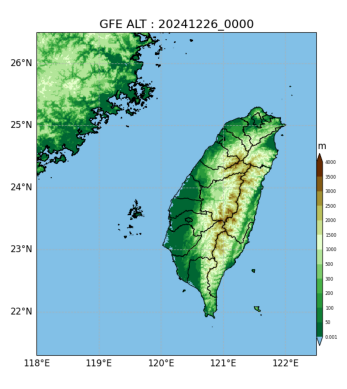

In [ ]:
# 預設的經緯度，預設的繪圖目標(地形)
ref_dir='CWA_WFC_SGGM/ref'
map_date = datetime.datetime(2024, 12, 26)
file_name = 'elevation_baseline_demo.png'

Draw_obj = DrawGriddataMap(ref_dir=ref_dir)
Draw_obj.set_info('GFE', 'ALT', map_date)
Draw_obj.draw(file_name, 'elevation') # 畫中距離

########## 下方顯示繪圖，實際使用公版繪圖時不需要此段 ##########
webp_show(file_name)

# (四) 各類繪圖參數介紹

In [ ]:
# 載入範例用，已整理好的資料
!git clone https://github.com/yutsung/load_demo_griddata.git
from load_demo_griddata.data_loader import load_0p01d_data
tp, t2m, u10, v10, ws10 = load_0p01d_data(data_path='load_demo_griddata')

Cloning into 'load_demo_griddata'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 2), reused 9 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (9/9), 3.56 MiB | 8.92 MiB/s, done.
Resolving deltas: 100% (2/2), done.


## 1.一般繪圖

  重要：若要疊置製風標則「必須」使用一般繪圖
  
    Draw_obj.draw()

  （無法使用後述介紹的zoom_in與zoom_out繪圖）



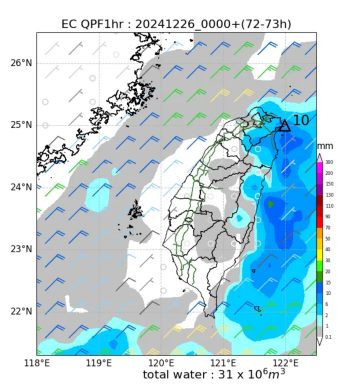

In [ ]:
Draw_obj = DrawGriddataMap(ref_dir=ref_dir)
Draw_obj.put_data(tp)           # 資料放這裡
Draw_obj.calculate_gfe1km_total_water() # 若變數為降水，可呼叫此函數在圖下方顯示總水量
Draw_obj.put_uwind_vwind(u10, v10)    # 若需要繪製風標，必須將uv風資料放這裡

# set_info(product, parameter, init_date, lead_time_start=-999, lead_time_end=None, lead_time_unit='h')
Draw_obj.set_info('EC', 'QPF1hr', map_date, 72, 73) # 應該要見到Title隨設定變化

file_name = 'rain_markmax_barbs_f072.webp'
Draw_obj.draw('rain_markmax_barbs_f072.webp', 'precipitation',     #　out_path, cmap_name, 色階關鍵字要去翻參考檔案 SGGM/ref/colorset.json
       draw_barbs=True, black_barbs=False, length=7,       #　風標設定
       draw_max=False, draw_max_tw=False, draw_max_main=True,
       draw_min=False, draw_min_tw=False, draw_min_main=False, # 極值設定  _tw=只看中華民國領土(不含外傘頂洲) _main=只看台灣本島及附近陸地(不含外傘頂洲)
       dark_mode=False, mark_limit_num=1,            # dark_mode=海岸線改用亮黃色 mark改用白色
       china_coast=True, coast_width=0.8, caisancho=False,   # 海岸線顯示設定, caisancho = 外傘頂洲
       road=True, road_ph61=False)                # 道路顯示設定 road:高速公路 road_ph61:台61線(西部濱海快速公路)


########## 下方顯示繪圖，實際使用公版繪圖時不需要此段 ##########
webp_show(file_name)

## 2.大/小範圍繪圖

大範圍繪圖：涵蓋更寬廣的台灣周圍地區

小範圍繪圖：將台灣澎湖放大至滿版(較遠外島有另外小視窗)

    Draw_obj.draw_zoom_in()

    Draw_obj.draw_zoom_out()

設定同1.一般繪圖，但無法繪製風標

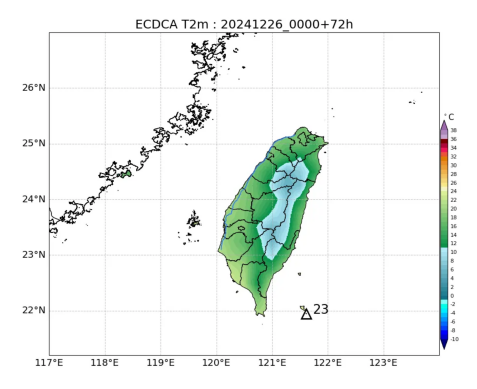

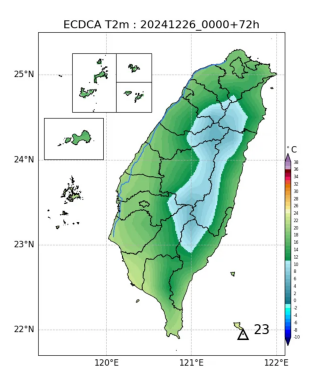

In [ ]:

Draw_obj = DrawGriddataMap(ref_dir=ref_dir)
Draw_obj.put_data(t2m)    # 資料放這裡

Draw_obj.mask_sea_gfe1km()  # 可以呼叫此函數使之不顯示海面資料

# set_info(product, parameter, init_date, lead_time_start=-999, lead_time_end=None, lead_time_unit='h')
Draw_obj.set_info('ECDCA', 'T2m', map_date, 72)

file_name1 = 'ecdca_t2m_f072_zoom_out.webp'
Draw_obj.draw_zoom_out('ecdca_t2m_f072_zoom_out.webp', 'temperature',       #　out_path, cmap_name, 色階關鍵字要去翻參考檔案 SGGM/ref/colorset.json
            draw_max=False, draw_max_tw=False, draw_max_main=True,
            draw_min=False, draw_min_tw=False, draw_min_main=False,  # 極值設定  _tw=只看中華民國領土(不含外傘頂洲) _main=只看台灣本島周遭(不含外傘頂洲)
            dark_mode=False, mark_limit_num=1,             # dark_mode:海岸線改用亮黃色 mark改用白色
            china_coast=True, coast_width=0.8, caisancho=False,   # 海岸線顯示設定, caisancho = 外傘頂洲
            road=False, road_ph61=True)                # 道路顯示設定 road:高速公路 road_ph61:台61線(西部濱海快速公路)

file_name2 = 'ecdca_t2m_f072_zoom_in.webp'
Draw_obj.draw_zoom_in('ecdca_t2m_f072_zoom_in.webp', 'temperature',        #　out_path, cmap_name, 色階關鍵字要去翻參考檔案 SGGM/ref/colorset.json
           draw_max=False, draw_max_tw=False, draw_max_main=True,
           draw_min=False, draw_min_tw=False, draw_min_main=False,  # 極值設定  _tw=只看中華民國領土(不含外傘頂洲) _main=只看台灣本島周遭(不含外傘頂洲)
           dark_mode=False, mark_limit_num=1,             # dark_mode:海岸線改用亮黃色 mark改用白色
           china_coast=False, coast_width=0.8, caisancho=False,    # 海岸線顯示設定, caisancho = 外傘頂洲
           road=False, road_ph61=True)                 # 道路顯示設定 road:高速公路 road_ph61:台61線(西部濱海快速公路)

########## 下方顯示繪圖，實際使用公版繪圖時不需要此段 ##########
webp_show(file_name1)
webp_show(file_name2)

## 3.風標繪圖

  專門用來單純繪製風標，無網格無標題

    Draw_obj.draw_wind_barbs()

  風標外的部分會是透明的，方便疊圖

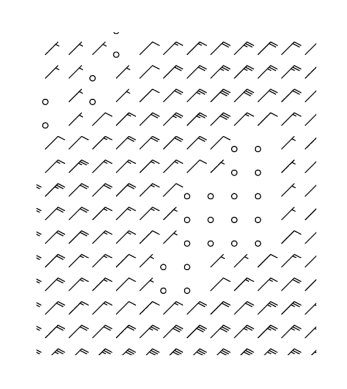

In [ ]:
Draw_obj = DrawGriddataMap(ref_dir=ref_dir)
Draw_obj.put_uwind_vwind(u10, v10)             # 若需要繪製風標，必須將uv風資料放這裡
Draw_obj.set_info('EC', 'QPF1hr', map_date, 72, 73)   # 定義範圍，不會顯示標題
file_name = 'wind_barb_black_demo.webp'
Draw_obj.draw_wind_barbs('wind_barb_black_demo.webp',    # out_path
              black_barbs=True, length=7)  # 風標設定

########## 下方顯示繪圖，實際使用公版繪圖時不需要此段 ##########
webp_show(file_name)

## 4.其他

### a. 網格解析度
  
  若為較粗的格點，繪圖前請自行內插至0.01°解析度(1km)

### b. 資料範圍
  
  若為全球範圍資料，請先裁切成台灣附近資料

### c. 符合規範的資料shape
  
  若希望使用極值設定 _tw, _main 或是總降水量函數
  
  則「必須」確保資料大小為下列兩者之一

  525 x 575 : 21.48°N～26.72°N, 117.78°E～123.52°E (即為GFE 1km網格)

  581 x 701 : 21.20°N～27.00°N, 117.00°E～124.00°E

### d. 資料翻轉

  氣象資料grib2的原點(第一個資料點)不一定是左上

  若經緯的網格是自行產生而非直接讀取

  2d資料進入繪圖公版前要np.flip來保證資料有對齊

# (五) 實際範例:由grib2到webp

最後我們實際走一遍由原始grib2資料至產出所需的webp圖檔

檔源是位於範例git中example資料夾下的 `GaugeCorr_QPE_01H_00.00_20250605-000000.grib2`

In [ ]:
# 安裝本範例中用於資料前處理的其他必要元件
!pip install eccodes pygrib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 46.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.6/18.6 MB 36.8 MB/s eta 0:00:00


In [ ]:
# 載入必要模組
import pygrib
import os
import datetime # 載入時間處理套件
import numpy as np # 載入所需第三方套件
from CWA_WFC_SGGM.module.draw_griddata import DrawGriddataMap # 載入繪圖公版

## 1.確認資料的結構
在一般的linux系統中，可簡單的使用grib_dump來做檢查

本教程中使用python環境中的pygrib來示範

In [ ]:
grib_file_path = '/content/CWA_WFC_SGGM/example/GaugeCorr_QPE_03H_00.00_20250605-080000.grib2'
# ---------------------------------------------

# 建議的核心/常用 GRIB Keys 清單
PREFERRED_KEYS = [
    'name', 'shortName', 'paramId', 'units',
    'level', 'typeOfLevel', 'nameOfFirstFixedSurface',
    'dataDate', 'dataTime', 'year', 'month', 'day', 'hour', 'minute',
    'stepRange', 'forecastTime', 'stepUnits', 'startStep',
    'gridType',
    'Nx', 'Ny', 'Ni', 'Nj', # 包含兩種常見的網格點數key名稱
    'latitudeOfFirstGridPointInDegrees', 'longitudeOfFirstGridPointInDegrees',
    'latitudeOfLastGridPointInDegrees', 'longitudeOfLastGridPointInDegrees',
    'iDirectionIncrementInDegrees', 'jDirectionIncrementInDegrees',
    'DxInMetres', 'DyInMetres', # 有些網格用公尺表示間距
    'centre', 'subCentre', 'generatingProcessIdentifier',
    'discipline', 'parameterCategory', 'parameterNumber', # GRIB2 的參數詳細定義
]

displayed_info = {}

try:
    grbs = pygrib.open(grib_file_path)
    number_of_messages = grbs.messages
    print(f"這個 GRIB2 檔案中總共有 {number_of_messages} 個層場。\n")

    if number_of_messages > 0:
        first_message = grbs.message(1) # pygrib 的訊息索引是從 1 開始

        print("第一個層場中，部分常用 Keys 及其值如下：")
        print("-----------------------------------------")

        for key_name in PREFERRED_KEYS:
            try:
                # 檢查 key 是否存在且有意義
                if first_message.has_key(key_name): # 先檢查 key 是否存在
                    if not first_message.is_missing(key_name):
                        value = first_message[key_name]
                        if not (isinstance(value, str) and value.lower() == 'unknown'):
                            displayed_info[key_name] = value
                    # else: 是 GRIB missing value, 不顯示
                # else: key 不存在於此訊息中, 不顯示
            except Exception as e_key:
                # 讀取特定 key 時可能發生其他錯誤
                print(f"讀取 key '{key_name}' 時發生問題: {e_key}")
                pass

        if displayed_info:
            for key, val in displayed_info.items():
                print(f"- {key}: {val}")
        else:
            print("在預定義的常用 Keys 清單中，沒有找到具有有效值的 Keys。")
        print("-----------------------------------------")

    grbs.close()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 {grib_file_path}")
except pygrib.NoMessagesError:
    print(f"錯誤：檔案 {grib_file_path} 中沒有 GRIB 訊息。")
except Exception as e:
    print(f"讀取或處理檔案時發生錯誤: {e}")

這個 GRIB2 檔案中總共有 1 個層場。

第一個層場中，部分常用 Keys 及其值如下：
-----------------------------------------
- paramId: 0
- level: 0
- typeOfLevel: heightAboveSea
- nameOfFirstFixedSurface: Specific altitude above mean sea level
- dataDate: 20250605
- dataTime: 800
- year: 2025
- month: 6
- day: 5
- hour: 8
- minute: 0
- stepRange: 0m
- forecastTime: 0
- stepUnits: 0
- startStep: 0m
- gridType: regular_ll
- Nx: 601
- Ny: 701
- Ni: 601
- Nj: 701
- latitudeOfFirstGridPointInDegrees: 27.004999
- longitudeOfFirstGridPointInDegrees: 117.995003
- latitudeOfLastGridPointInDegrees: 19.994999
- longitudeOfLastGridPointInDegrees: 124.005003
- iDirectionIncrementInDegrees: 0.01
- jDirectionIncrementInDegrees: 0.01
- centre: 138
- subCentre: 3
- generatingProcessIdentifier: 98
- discipline: 0
- parameterCategory: 15
- parameterNumber: 194
-----------------------------------------


確認以下事項

a. 確認需要的層場資料：僅有一個層場，雖然沒有name/shortName，但檔名指示這是QPE 3hr

b. 確認經緯度：lat 20°N到27°N, lon 118°E到124°E，範圍為台灣附近區域

c. 格點密度：經緯都是0.01度，符合需求，不需做內插

其他如forcasTtime, level等參數在某些繪圖中會是重要的，請自行衡量

d. 最後，看一眼資料的統計量，確定沒有明顯的問題

In [ ]:
# 要查詢的 GRIB 統計量 Keys
STATISTICAL_KEYS = [
    'maximum', 'minimum', 'average',
    'standardDeviation', 'skewness', 'kurtosis',
    'numberOfMissing', 'numberOfValues', 'numberOfPoints']
try:
    grbs = pygrib.open(grib_file_path)
    first_message = grbs.message(1)

    # 獲取並顯示統計量
    print(f"--- GRIB 內建統計量 ---")
    for stat_key in STATISTICAL_KEYS:
      if first_message.has_key(stat_key):
        value = first_message[stat_key]
        print(f"- {stat_key}: {value}")
    print("--------------------------\n")

    grbs.close()

except FileNotFoundError:
    print(f"錯誤：找不到檔案 {grib_file_path}")
except pygrib.NoMessagesError:
     print(f"錯誤：檔案 {grib_file_path} 中沒有 GRIB 訊息。")
except Exception as e:
    print(f"處理檔案時發生未預期的錯誤: {e}")

--- GRIB 內建統計量 ---
- maximum: 123.0
- minimum: -99900.0
- average: -76309.7387598178
- standardDeviation: 42429.625301186774
- skewness: 1.2426221000539939
- kurtosis: -0.45589026429702884
- numberOfMissing: 0
- numberOfValues: 421301
- numberOfPoints: 421301
--------------------------



## 2.讀取需要的層場資料

In [ ]:
grib_data_array = None
try:
    grbs = pygrib.open(grib_file_path)
    first_message = grbs.message(1)

    # 獲取數值資料並存到 NumPy 陣列
    print(f"--- 數值資料 ---")
    QPE_data_array = first_message.values
    print(f"QPE資料已讀取到名為 'QPE_data_array' 的 NumPy 陣列中。")

    print("---------------------------------------\n")

    print(f"-- 建立經緯度網格 --")

    '''
    lat_top = first_message.latitudeOfFirstGridPointInDegrees
    lat_down = first_message.latitudeOfLastGridPointInDegrees
    lon_left = first_message.longitudeOfFirstGridPointInDegrees
    lon_right = first_message.longitudeOfLastGridPointInDegrees
    # 由於在上一步中看到grib檔頭的經緯度value有浮點數誤差
    # 因此決定手動輸入經緯度
    '''
    lat_top, lat_down = 27.0, 20.0
    lon_left, lon_right = 118.0, 124.0
    lat_num = first_message.Nj
    lon_num = first_message.Ni

    grbs.close()

    # 創建經緯網格
    lat_1d = np.linspace(lat_top, lat_down, lat_num)
    lon_1d = np.linspace(lon_left, lon_right, lon_num)
    new_lon, new_lat = np.meshgrid(lon_1d, lat_1d)

    print(f"將經度與緯度的網格資料存入new_lon, new_lat")
    print("---------------------------------------\n")

except FileNotFoundError:
    print(f"錯誤：找不到檔案 {grib_file_path}")
except pygrib.NoMessagesError:
     print(f"錯誤：檔案 {grib_file_path} 中沒有 GRIB 訊息。")
except Exception as e:
    print(f"處理檔案時發生未預期的錯誤: {e}")
    import traceback
    traceback.print_exc()

--- 數值資料 ---
QPE資料已讀取到名為 'QPE_data_array' 的 NumPy 陣列中。
---------------------------------------

-- 建立經緯度網格 --
將經度與緯度的網格資料存入new_lon, new_lat
---------------------------------------



## 3.將資料輸入公版繪圖

由於我們希望使用台灣範圍最大值以及總降水量

    draw_max_main=True
    Draw_obj.calculate_gfe1km_total_water()

因此必須裁切資料至指定shape

525 x 575 : 21.48°N～26.72°N, 117.78°E～123.52°E (即GFE 1km網格)

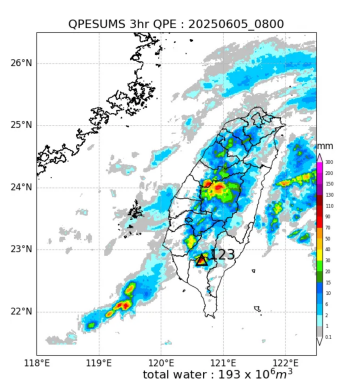

In [ ]:
# 資料裁切，因為我們希望調用draw_max_main=True和Draw_obj.calculate_gfe1km_total_water
# 原始資料無法涵蓋全部的標準化範圍，剩餘部位補上一個極小負值

new_QPE_data_array = np.full([525, 575], -1e-6)
new_QPE_data_array[:, 22:] = QPE_data_array[28:553, :553]

# 創建符合指定規則的新經緯網格
lat_1d = np.linspace(21.48, 26.72, 525)
lon_1d = np.linspace(117.78, 123.52, 575)
new_lon, new_lat = np.meshgrid(lon_1d, lat_1d)


# 其他預處理
new_QPE_data_array = np.where(new_QPE_data_array < 0, -1e-6, new_QPE_data_array) # 避免-99900影響總降水量的計算
new_QPE_data_array = np.flip(new_QPE_data_array, axis=0) # 送入前要flip來對齊資料

ref_dir='CWA_WFC_SGGM/ref'
Draw_obj = DrawGriddataMap(ref_dir=ref_dir)
Draw_obj.put_latlon(new_lat, new_lon) # 輸入經緯度資料
Draw_obj.put_data(new_QPE_data_array)    # 輸入QPE資料
Draw_obj.calculate_gfe1km_total_water() # 計算總降水量

# 設定繪圖資訊
init_time = datetime.datetime.strptime("20250605_0800", '%Y%m%d_%H%M')

Draw_obj.set_info(product='QPESUMS', parameter='3hr QPE', init_date=init_time)

# 繪製風場圖

file_name = '20250605_0800_QPESUMS_3hr.webp'
Draw_obj.draw(file_name, 'precipitation',                 #　out_path, cmap_name, 色階關鍵字要去翻參考檔案 SGGM/ref/colorset.json
      # draw_barbs=False, black_barbs=False, length=7,      #　風標設定
       draw_max=False, draw_max_tw=False, draw_max_main=True,
      # draw_min=False, draw_min_tw=False, draw_min_main=False, # 極值設定  _tw=只看中華民國領土(不含外傘頂洲) _main=只看台灣本島及附近陸地(不含外傘頂洲)
      # dark_mode=False, mark_limit_num=1,            # dark_mode=海岸線改用亮黃色 mark改用白色
       china_coast=True, coast_width=0.8, caisancho=False,   # 海岸線顯示設定, caisancho = 外傘頂洲
      # road=False, road_ph61=False                # 道路顯示設定 road:高速公路 road_ph61:台61線(西部濱海快速公路)
        )


########## 下方顯示繪圖，實際使用公版繪圖時不需要此段 ##########
webp_show(file_name)

# (六) 練習

以下git附上一個ECMWF資料繪製風力預報圖的檔案



In [ ]:
# 內含20250306_0000f000.grib2，以及參考解答 wind_forecast.py
!git clone https://github.com/aa124816/SGGM_demo.git

Cloning into 'SGGM_demo'...
remote: Enumerating objects: 4, done.
remote: Counting objects: 100% (4/4), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 0), reused 4 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (4/4), 2.66 MiB | 12.16 MiB/s, done.


請試著使用公版繪圖製作如下圖的風力預報圖

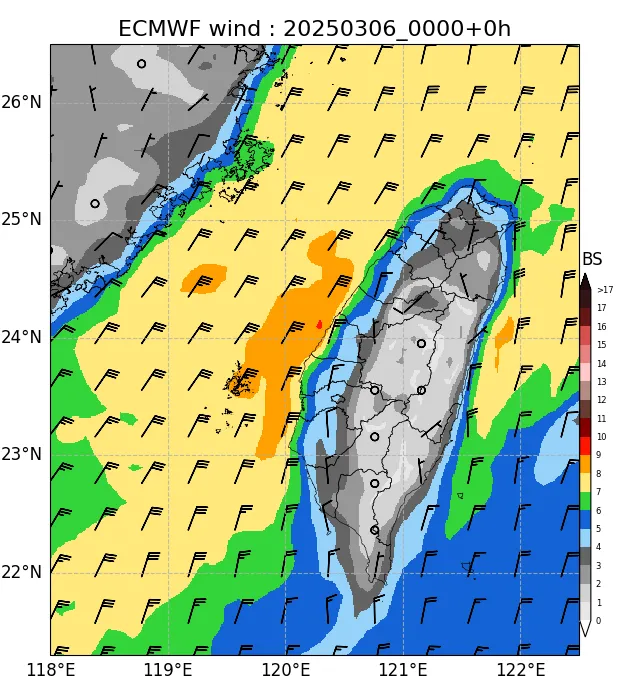